In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime as dt, date

In [15]:
#import csv data to pandas data frame
df = pd.read_csv("data/mauna_loa_co2_mlo_sept_2021_formatted.csv")
df.head()

,Yr,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71


In [3]:
#show available columns
df.columns

Index(['Yr', 'Mn', 'Date1', 'Date2', 'CO2', 'seasonally_adjusted', 'fit',
       'seasonally_adjusted_fit', 'CO2_filled', 'seasonally_adjusted_filled'],
      dtype='object')

In [4]:
#data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Yr                          768 non-null    int64  
 1   Mn                          768 non-null    int64  
 2   Date1                       768 non-null    int64  
 3   Date2                       768 non-null    float64
 4   CO2                         768 non-null    float64
 5   seasonally_adjusted         768 non-null    float64
 6   fit                         768 non-null    float64
 7   seasonally_adjusted_fit     768 non-null    float64
 8   CO2_filled                  768 non-null    float64
 9   seasonally_adjusted_filled  768 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 60.1 KB


In [5]:
#year to string
df["Yr"] = df["Yr"].apply(lambda x: str(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Yr                          768 non-null    object 
 1   Mn                          768 non-null    int64  
 2   Date1                       768 non-null    int64  
 3   Date2                       768 non-null    float64
 4   CO2                         768 non-null    float64
 5   seasonally_adjusted         768 non-null    float64
 6   fit                         768 non-null    float64
 7   seasonally_adjusted_fit     768 non-null    float64
 8   CO2_filled                  768 non-null    float64
 9   seasonally_adjusted_filled  768 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [8]:
#rename column
df = df.rename(columns = {"Yr" : "Year"})
df

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Jan
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Feb
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,Mar
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,Apr
4,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,May
...,...,...,...,...,...,...,...,...,...,...,...
763,2021,8,44423,2021.6219,414.34,415.90,414.53,416.12,414.34,415.90,Aug
764,2021,9,44454,2021.7068,412.90,416.42,-99.99,-99.99,412.90,416.42,Sep
765,2021,10,44484,2021.7890,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Oct
766,2021,11,44515,2021.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Nov


In [9]:
#convert month number to month name
month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 
              5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 
              9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
df["Month"] = df["Mn"].map(month_dict)
df

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Jan
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Feb
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,Mar
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,Apr
4,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,May
...,...,...,...,...,...,...,...,...,...,...,...
763,2021,8,44423,2021.6219,414.34,415.90,414.53,416.12,414.34,415.90,Aug
764,2021,9,44454,2021.7068,412.90,416.42,-99.99,-99.99,412.90,416.42,Sep
765,2021,10,44484,2021.7890,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Oct
766,2021,11,44515,2021.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Nov


In [10]:
#concat month name and year
df["Time"] = df["Mn"].astype(str) + "-" + df["Year"]
df

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month,Time
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Jan,1-1958
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Feb,2-1958
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,Mar,3-1958
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,Apr,4-1958
4,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,May,5-1958
...,...,...,...,...,...,...,...,...,...,...,...,...
763,2021,8,44423,2021.6219,414.34,415.90,414.53,416.12,414.34,415.90,Aug,8-2021
764,2021,9,44454,2021.7068,412.90,416.42,-99.99,-99.99,412.90,416.42,Sep,9-2021
765,2021,10,44484,2021.7890,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Oct,10-2021
766,2021,11,44515,2021.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Nov,11-2021


In [11]:
#convert time (string type) to datetime type
df["Time"] = df["Time"].apply(lambda x: dt.strptime(x, "%m-%Y"))
df

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month,Time
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Jan,1958-01-01
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Feb,1958-02-01
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,Mar,1958-03-01
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,Apr,1958-04-01
4,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,May,1958-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
763,2021,8,44423,2021.6219,414.34,415.90,414.53,416.12,414.34,415.90,Aug,2021-08-01
764,2021,9,44454,2021.7068,412.90,416.42,-99.99,-99.99,412.90,416.42,Sep,2021-09-01
765,2021,10,44484,2021.7890,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Oct,2021-10-01
766,2021,11,44515,2021.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,Nov,2021-11-01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Year                        768 non-null    object        
 1   Mn                          768 non-null    int64         
 2   Date1                       768 non-null    int64         
 3   Date2                       768 non-null    float64       
 4   CO2                         768 non-null    float64       
 5   seasonally_adjusted         768 non-null    float64       
 6   fit                         768 non-null    float64       
 7   seasonally_adjusted_fit     768 non-null    float64       
 8   CO2_filled                  768 non-null    float64       
 9   seasonally_adjusted_filled  768 non-null    float64       
 10  Month                       768 non-null    object        
 11  Time                        768 non-null    datetime64[ns]

In [13]:
#start_date and end_date can be datetime.datetimes, np.datetime64s, pd.Timestamps, or even datetime strings
mask = (df['Time'] >= dt.strptime("1-1-2010", "%d-%m-%Y")) & (df['Time'] <= dt.strptime("1-1-2020", "%d-%m-%Y"))
time_ranged = df.loc[mask]
time_ranged

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month,Time
624,2010,1,40193,2010.0411,388.55,388.50,388.83,388.76,388.55,388.50,Jan,2010-01-01
625,2010,2,40224,2010.1260,390.08,389.33,389.75,388.99,390.08,389.33,Feb,2010-02-01
626,2010,3,40252,2010.2027,391.02,389.51,390.71,389.19,391.02,389.51,Mar,2010-03-01
627,2010,4,40283,2010.2877,392.39,389.67,392.13,389.40,392.39,389.67,Apr,2010-04-01
628,2010,5,40313,2010.3699,393.24,389.93,392.90,389.59,393.24,389.93,May,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
740,2019,9,43723,2019.7068,408.48,411.98,408.44,411.96,408.48,411.98,Sep,2019-09-01
741,2019,10,43753,2019.7890,408.40,412.02,408.57,412.17,408.40,412.02,Oct,2019-10-01
742,2019,11,43784,2019.8740,410.16,412.44,410.15,412.40,410.16,412.44,Nov,2019-11-01
743,2019,12,43814,2019.9562,411.81,412.74,411.70,412.61,411.81,412.74,Dec,2019-12-01


In [14]:
alt.Chart(df[df["CO2_filled"] != -99.99]).mark_line().encode(
    x = alt.X("Time:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title = "Time"),
    y = alt.Y('CO2_filled', title='CO2 (ppm)'),
    tooltip = ["CO2_filled","Month","Year"]
).properties(
    title="Monthly CO2 Concentration",
    width=800,
    height=300
).interactive()

#kurg change hover label, tambahin garis hover

alt.Chart(...)

In [13]:
alt.Chart(df[df["CO2_filled"] != -99.99]).mark_line().encode(
    x = alt.X("Year", title = "Time (Year)"),
    y = alt.Y("Avg_CO2:Q", title= 'Average CO2 (ppm)'),
    tooltip = ["Year", alt.Tooltip("Avg_CO2:Q", format=",.2f")]
).transform_aggregate(
    Avg_CO2 = "mean(CO2_filled)",
    groupby = ["Year"]
).properties(
    title="Yearly Average CO2 Concentration",
    width=800,
    height=300
).interactive()

alt.Chart(...)

In [14]:
data = df[df["CO2_filled"] != -99.99]

# hover selection
hover =  alt.selection_single(
        encodings = ["x"],
        nearest=True,
        on="mouseover",
        empty="none",
        clear="mouseout",
)

# base chart
base = alt.Chart(data).mark_line().encode(
    x = alt.X("Year", title = "Time (Year)"),
    y = alt.Y("Avg_CO2:Q", title= 'Average CO2 (ppm)')
).transform_aggregate(
    Avg_CO2 = "mean(CO2_filled)",
    groupby = ["Year"]
)

# show value on hover
show = alt.Chart(data).mark_point().encode(
    x='Year',
    opacity=alt.value(0),
    tooltip = ["Year", alt.Tooltip("Avg_CO2:Q", format=",.2f")]
).transform_aggregate(
    Avg_CO2 = "mean(CO2_filled)",
    groupby = ["Year"]
).add_selection(
    hover
)

# vertical line on hover
rule = alt.Chart(data).mark_rule(color='red').encode(
    x="Year",
    opacity=alt.condition(hover, alt.value(1), alt.value(0))
).transform_filter(
    hover
)

# combine all components
alt.layer(
    base, show, rule,
    base.mark_circle(color = "green").encode(
        opacity=alt.condition(hover, alt.value(1), alt.value(0))
    ).transform_filter(hover)
).properties(
    title="Yearly Average CO2 Concentration",
    width=800,
    height=300
).interactive()

alt.LayerChart(...)

## Time Series Analysis

[Reference](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

In [49]:
#import csv data to pandas data frame
raw = pd.read_csv("data/mauna_loa_co2_formatted.csv")
print(raw.head())
print(raw.tail())

     Yr  Mn  Date1      Date2     CO2  seasonally_adjusted     fit  \
0  1958   1  21200  1958.0411  -99.99               -99.99  -99.99   
1  1958   2  21231  1958.1260  -99.99               -99.99  -99.99   
2  1958   3  21259  1958.2027  315.71               314.43  316.20   
3  1958   4  21290  1958.2877  317.45               315.16  317.30   
4  1958   5  21320  1958.3699  317.51               314.71  317.87   

   seasonally_adjusted_fit  CO2_filled  seasonally_adjusted_filled  
0                   -99.99      -99.99                      -99.99  
1                   -99.99      -99.99                      -99.99  
2                   314.91      315.71                      314.43  
3                   314.99      317.45                      315.16  
4                   315.07      317.51                      314.71  
       Yr  Mn  Date1      Date2     CO2  seasonally_adjusted     fit  \
763  2021   8  44423  2021.6219  414.34               415.90  414.53   
764  2021   9  44454 

In [50]:
#data preparation
#rows selection (eliminate lines with missing values in column 5-10) -> first 2 rows and last 3 rows
raw = raw.iloc[2:765,]
print(raw.head())
print(raw.tail())

     Yr  Mn  Date1      Date2     CO2  seasonally_adjusted     fit  \
2  1958   3  21259  1958.2027  315.71               314.43  316.20   
3  1958   4  21290  1958.2877  317.45               315.16  317.30   
4  1958   5  21320  1958.3699  317.51               314.71  317.87   
5  1958   6  21351  1958.4548  -99.99               -99.99  317.25   
6  1958   7  21381  1958.5370  315.86               315.20  315.86   

   seasonally_adjusted_fit  CO2_filled  seasonally_adjusted_filled  
2                   314.91      315.71                      314.43  
3                   314.99      317.45                      315.16  
4                   315.07      317.51                      314.71  
5                   315.15      317.25                      315.15  
6                   315.22      315.86                      315.20  
       Yr  Mn  Date1      Date2     CO2  seasonally_adjusted     fit  \
760  2021   5  44331  2021.3699  418.95               415.53  419.14   
761  2021   6  44362 

In [51]:
#rename column
raw = raw.rename(columns = {"Yr": "Year"})

#add "Month" column for month name
month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 
              5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 
              9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
raw["Month"] = raw["Mn"].map(month_dict)

#unique year
years = raw["Year"].unique()

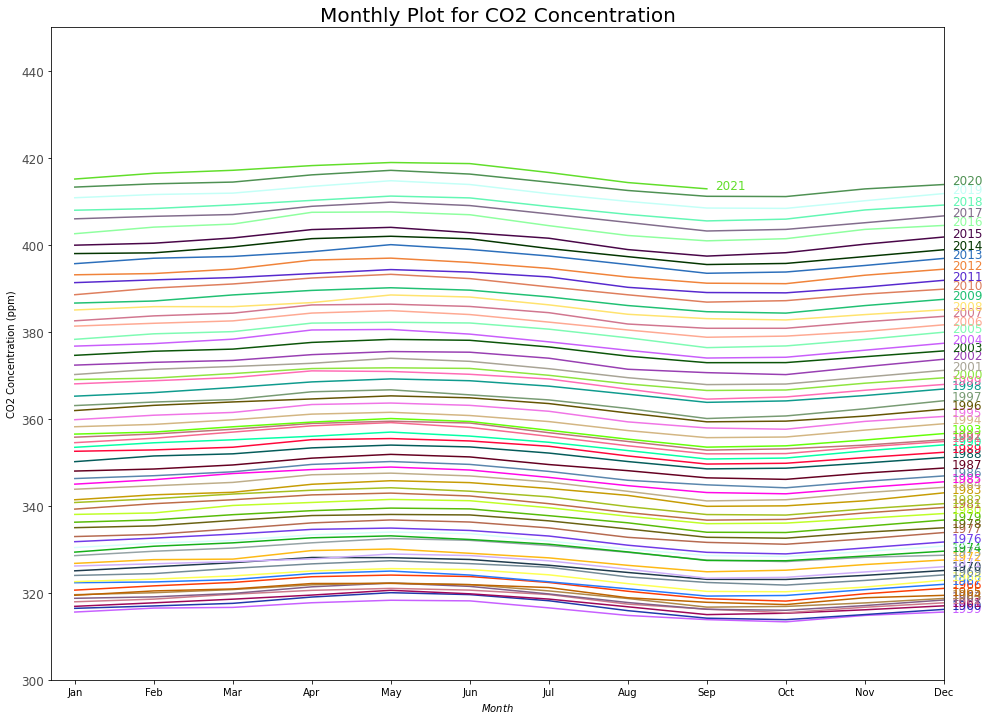

In [18]:
# colors for plot
np.random.seed(100)
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# draw plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('Month', 'CO2_filled', data = raw.loc[raw.Year == y, :], color = colors[i], label = y)
        plt.text(raw.loc[raw.Year == y, :].shape[0]-.9, raw.loc[raw.Year == y, 'CO2_filled'][-1:].values[0], y, fontsize=12, color = colors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(300, 450), ylabel='CO2 Concentration (ppm)', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Plot for CO2 Concentration", fontsize=20)
plt.show()

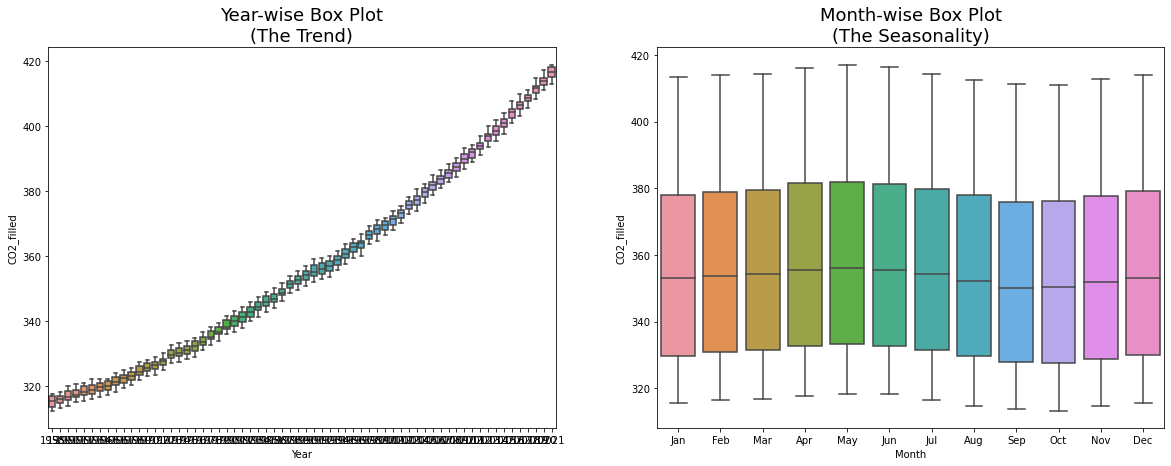

In [19]:
# boxplots
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(x = 'Year', y = 'CO2_filled', data = raw, ax = axes[0])
sns.boxplot(x = 'Month', y = 'CO2_filled', data = raw.loc[~raw.Year.isin([1958, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

#from the below plots, its very obvious that the time series pattern for the data is trend
#about the seasonality, it can be said that the CO2 concentration mostly increased in May and decreased in Sep

#### Components in Time Series
* Base Level
* Trend
* Seasonality
* Error

#### Additive Time Series
Value = Base Level + Trend + Seasonality + Error

#### Multiplicative Time Series
Value = Base Level * Trend * Seasonality * Error

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [21]:
# create index column
raw["Date"] = raw["Mn"].astype(str) + '-' + raw["Year"].astype(str)
raw["Date"] = raw["Date"].apply(lambda x: dt.strptime(x, "%m-%Y"))
raw_index = raw.set_index("Date")
raw_index.head()

,Year,Mn,Date1,Date2,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Month
Date,,,,,,,,,,,
1958-03-01,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,Mar
1958-04-01,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,Apr
1958-05-01,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,May
1958-06-01,1958,6,21351,1958.4548,-99.99,-99.99,317.25,315.15,317.25,315.15,Jun
1958-07-01,1958,7,21381,1958.5370,315.86,315.20,315.86,315.22,315.86,315.20,Jul


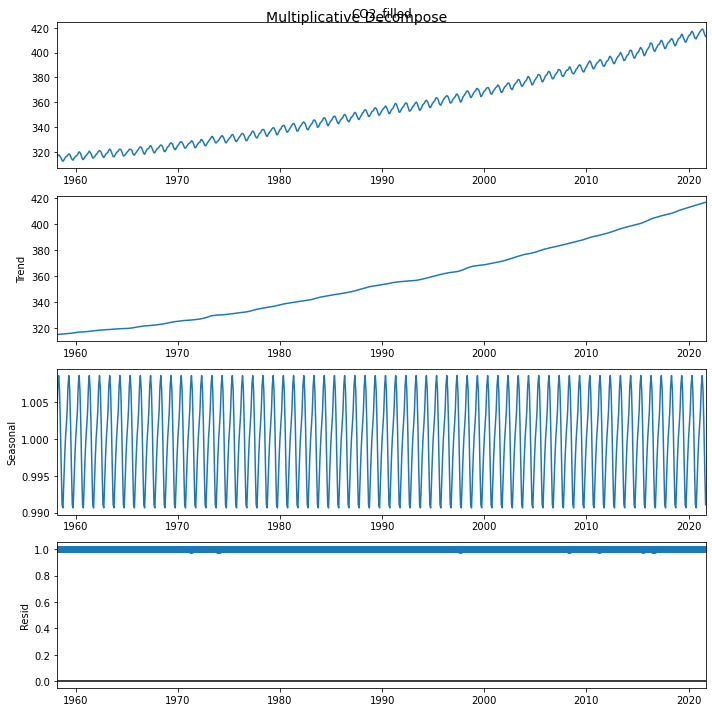

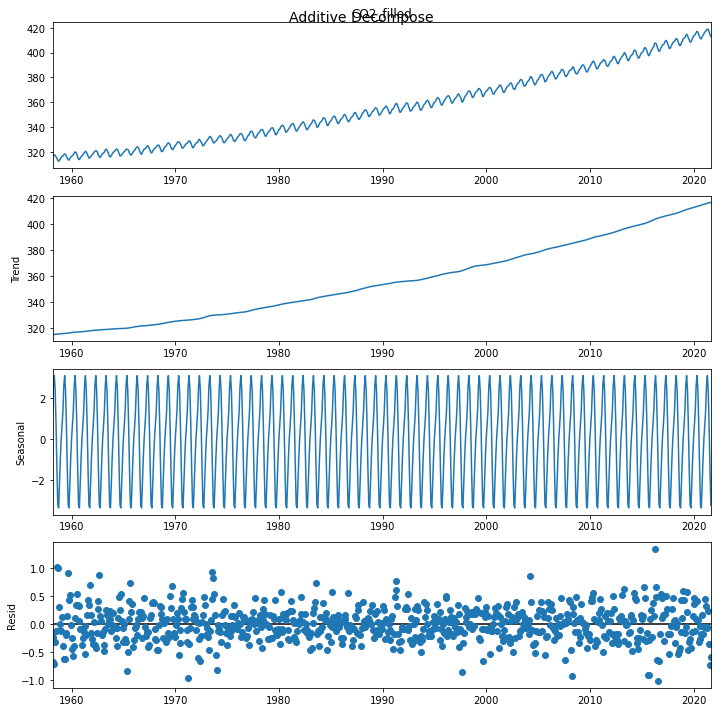

In [22]:
# decomposing time series to its components

# Multiplicative Decomposition 
result_mul = seasonal_decompose(raw_index['CO2_filled'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(raw_index['CO2_filled'], model='additive', extrapolate_trend='freq')

# Plot

plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=14)
result_add.plot().suptitle('Additive Decompose', fontsize=14)
plt.show()

From the plots above, the residuals of the multiplicative decomposition has some pattern. The residuals of the additive decomposition looks quite random (which is good). So ideally, additive decomposition should be preferred for this particular series.

In [23]:
# components extraction (from additive decomposition)
# actual_values = seasonal + trend + residual
reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
reconstructed.columns = ['seasonal', 'trend', 'residual', 'actual_values']
reconstructed.head()

,seasonal,trend,residual,actual_values
Date,,,,
1958-03-01,1.365342,315.023681,-0.679023,315.71
1958-04-01,2.593081,315.083557,-0.226638,317.45
1958-05-01,3.078558,315.143433,-0.711992,317.51
1958-06-01,2.362903,315.203310,-0.316213,317.25
1958-07-01,0.718328,315.263186,-0.121514,315.86


In [24]:
reconstructed["seasonal"] + reconstructed["trend"] + reconstructed["residual"] 

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.51
1958-06-01    317.25
1958-07-01    315.86
               ...  
2021-05-01    418.95
2021-06-01    418.70
2021-07-01    416.65
2021-08-01    414.34
2021-09-01    412.90
Length: 763, dtype: float64

## Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable. An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

#### Methods for Unit Root Test (Stationarity Test)
1. Augmented Dickey Fuller test (ADF Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

In [25]:
#check for stationarity

# ADF Test
#null hypothesis : the time series possesses a unit root and is non-stationary.
#if p-Value < alpha (0.05), reject the null hypothesis
adf_test = adfuller(raw["CO2_filled"].values, autolag='AIC')
#print(adf_test)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
for key, value in adf_test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
# The null hypothesis and the P-Value interpretation is just the opposite of ADH test
kpss_test = kpss(raw["CO2_filled"].values, regression='c')
#print(kpss_test)
print('\nKPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
for key, value in kpss_test[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 5.244638321739868
p-value: 1.0
Critial Values:
   1%, -3.4391937559530965
Critial Values:
   5%, -2.8654430713273373
Critial Values:
   10%, -2.568848417404698

KPSS Statistic: 3.676504
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


From the above results, the p-value from ADF test is 1, which is more than the significance level (0.05), therefore the null hypothesis isn't rejected (the time series is non-stationary). To convert from non-stationary into stationary for effective time series modeling, one of the major methods is detrending the time series data (remove the trend effect) 

## How to detrend a time series?
1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
2. Subtract the trend component obtained from time series decomposition we saw earlier.
3. Subtract the mean
4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Text(0.5, 1.0, 'CO2 Concentration detrended by subtracting the least squares fit')

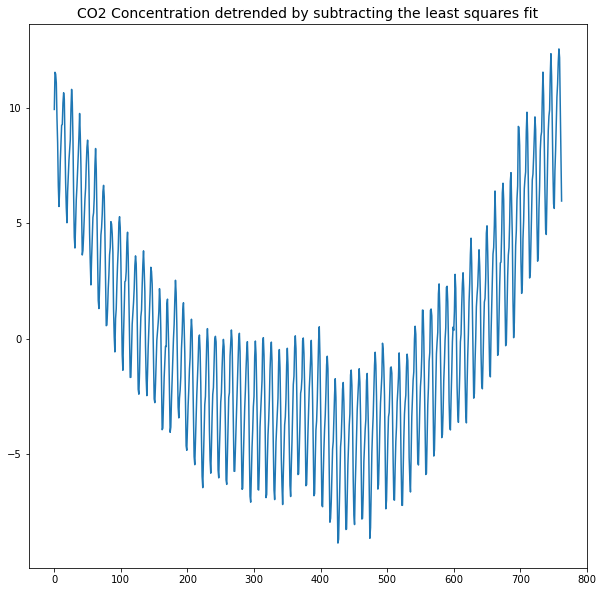

In [26]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(raw["CO2_filled"].values)
plt.plot(detrended)
plt.title('CO2 Concentration detrended by subtracting the least squares fit', fontsize=14)

Text(0.5, 1.0, 'CO2 Concentration detrended by subtracting the trend component')

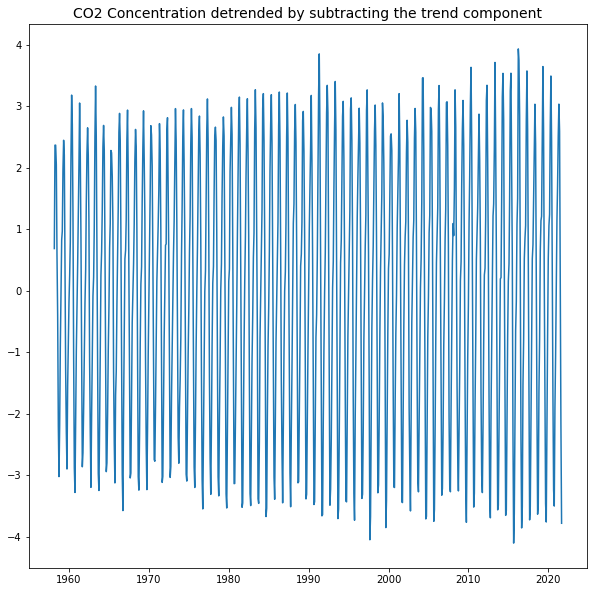

In [27]:
# Using statmodels: Subtracting the Trend Component
detrended2 = raw_index["CO2_filled"].values - result_add.trend
plt.plot(detrended2)
plt.title('CO2 Concentration detrended by subtracting the trend component', fontsize=14)

In [28]:
#series of CO2_filled detrended
detrended2

Date
1958-03-01    0.686319
1958-04-01    2.366443
1958-05-01    2.366567
1958-06-01    2.046690
1958-07-01    0.596814
                ...   
2021-05-01    3.033108
2021-06-01    2.593118
2021-07-01    0.353128
2021-08-01   -2.146862
2021-09-01   -3.776852
Name: trend, Length: 763, dtype: float64

In [29]:
adf_test2 = adfuller(detrended2.values, autolag='AIC')
print(f'ADF Statistic: {adf_test2[0]}')
print(f'p-value: {adf_test2[1]}')
for key, value in adf_test2[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.813588904632573
p-value: 1.88162390307976e-19
Critial Values:
   1%, -3.4391937559530965
Critial Values:
   5%, -2.8654430713273373
Critial Values:
   10%, -2.568848417404698


From the above results, the p-value from ADF test of the detrended CO2_filled is 1.88 * 10^-19, which is way less than the significance level (0.05), therefore the null hypothesis is rejected and the time series is already stationary.

## How to deseasonalize a time series?
1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.
2. Seasonal difference the series (subtract the value of previous season from the current value)
3. Divide the series by the seasonal index obtained from STL decomposition

*If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.*

[]

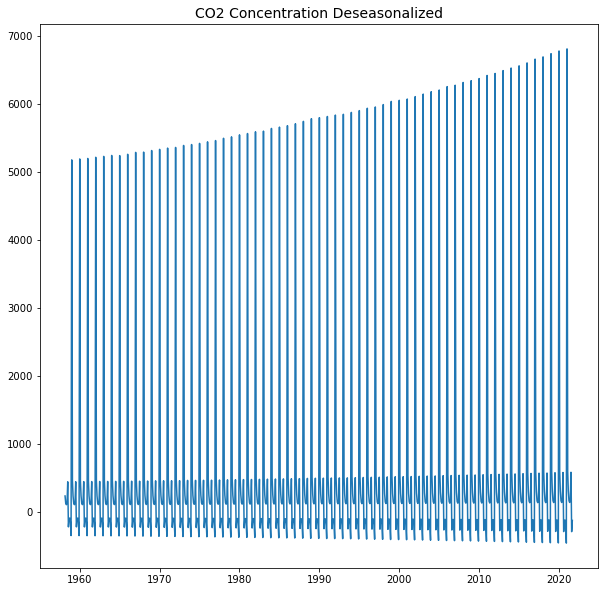

In [30]:
# Deseasonalize
deseasonalized = raw_index["CO2_filled"].values / result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('CO2 Concentration Deseasonalized', fontsize=14)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

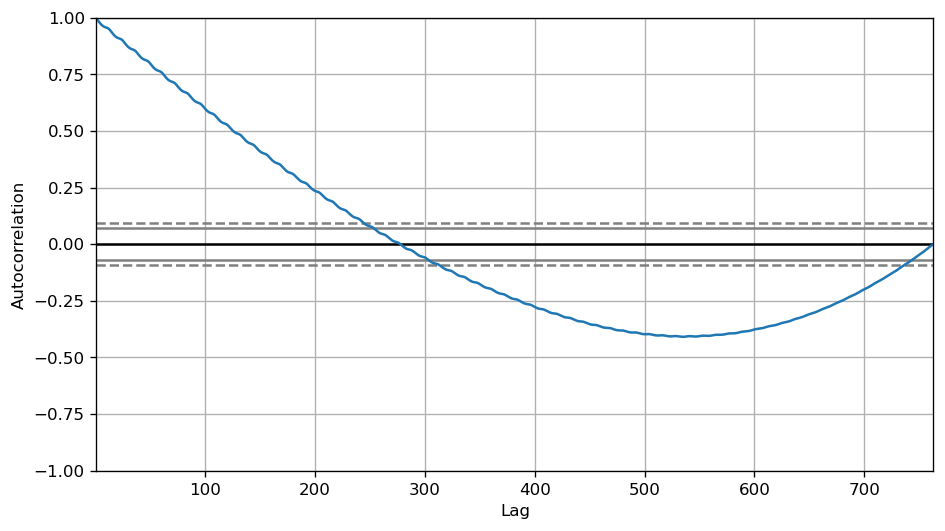

In [31]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(raw["CO2_filled"].tolist())

From the above plot, there isn't any repeated spikes that indicate seasonality.

## How to treat missing values in a time series?
Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero. Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value. However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:
- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts

**The dataset of Mauna Loa CO2 Concentration has a column where the CO2 missing values are filled with their fit values, so we don't need to treat the missing values instead use the CO2_filled column.**

## What is autocorrelation and partial autocorrelation functions?
Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value. Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

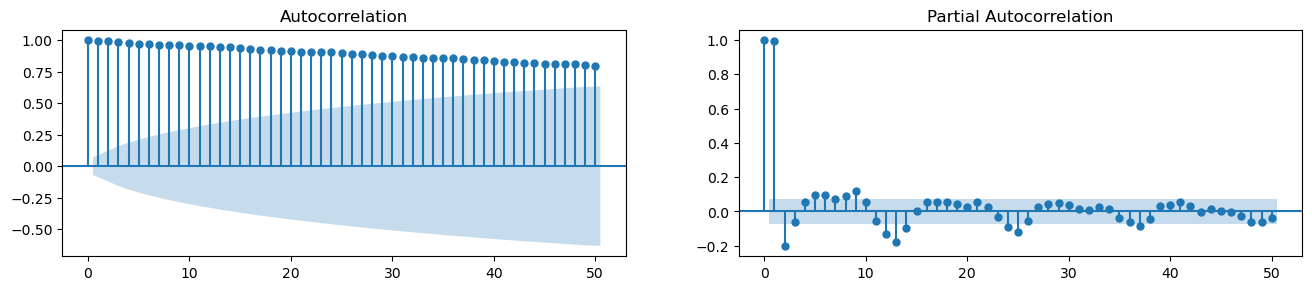

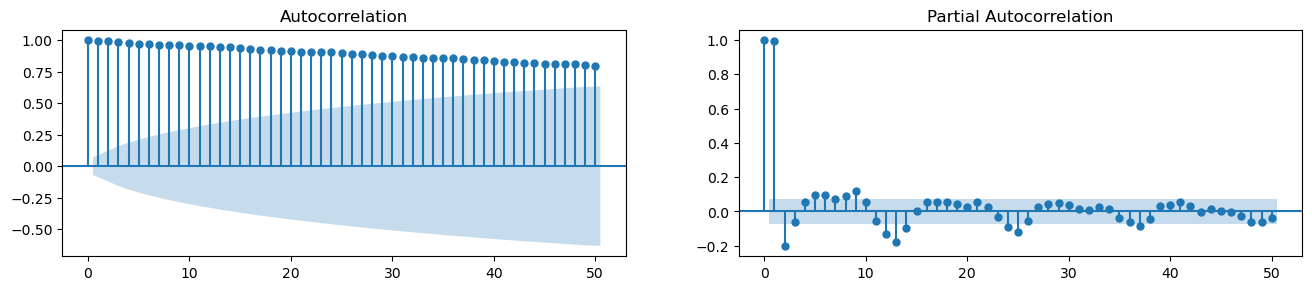

In [32]:
#plotting ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(raw["CO2_filled"].tolist(), lags=50, ax=axes[0])
plot_pacf(raw["CO2_filled"].tolist(), lags=50, ax=axes[1])

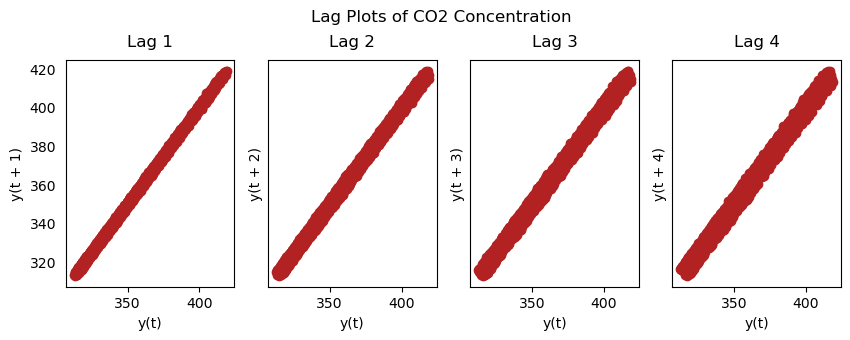

In [33]:
#lag plot : scatter plot of a time series against a lag of itself (normally used to check for autocorrelation)
#pattern existing in the series -> autocorrelated
#no such pattern -> likely to be random white noise
#if the points get more scattered with increasing lag it means lesser autocorrelation
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(raw["CO2_filled"], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of CO2 Concentration', y=1.05)    
plt.show()

#### Simple Moving Average (SMA)

In [34]:
raw["SMA_10"] = raw["CO2_filled"].rolling(10, min_periods=1).mean()
raw["SMA_20"] = raw["CO2_filled"].rolling(20, min_periods=1).mean()

Text(0, 0.5, 'CO2 Concentration (ppm)')

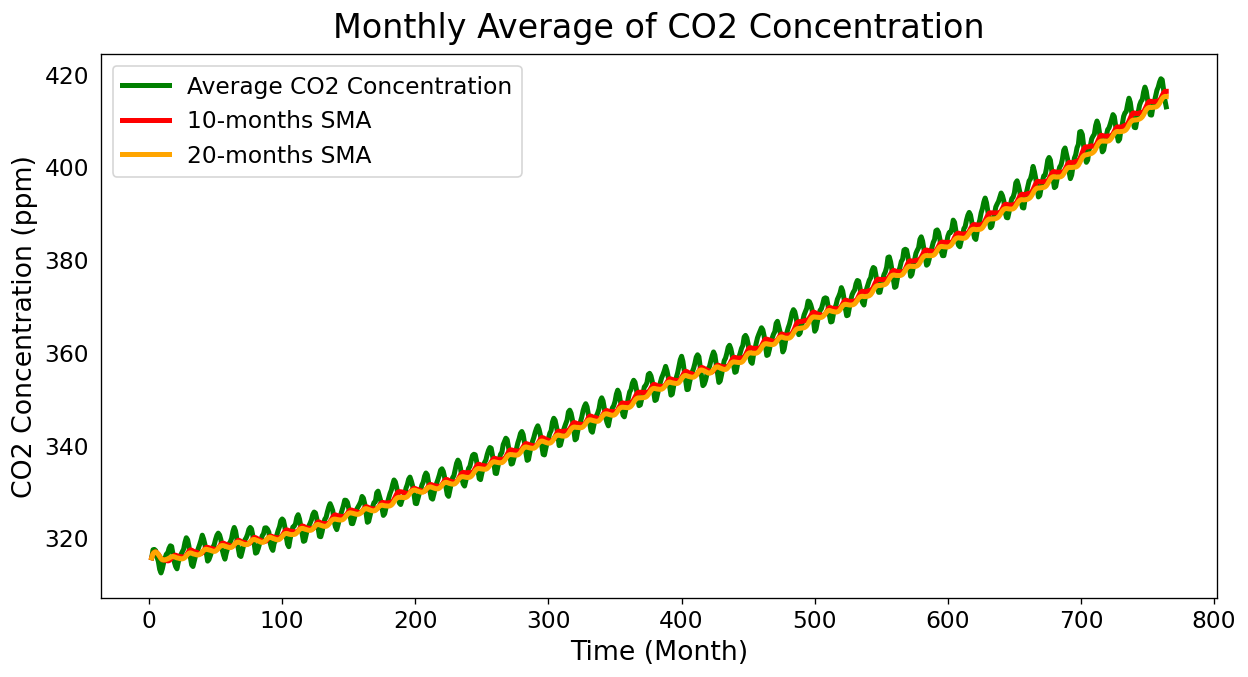

In [35]:
# Green = CO2 concentration, Red = 10 months, ORANGE = 20 months
colors = ['green', 'red', 'orange']
# Line plot 
raw[["CO2_filled","SMA_10","SMA_20"]].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average CO2 Concentration', '10-months SMA', '20-months SMA'], fontsize=14)
plt.title('Monthly Average of CO2 Concentration', fontsize=20)
plt.xlabel('Time (Month)', fontsize=16)
plt.ylabel('CO2 Concentration (ppm)', fontsize=16)

#### Cumulative Moving Average (CMA)
unweighted mean of past values, till the current time

In [36]:
raw['CMA'] = raw["CO2_filled"].expanding().mean()

Text(0, 0.5, 'CO2 Concentration (ppm)')

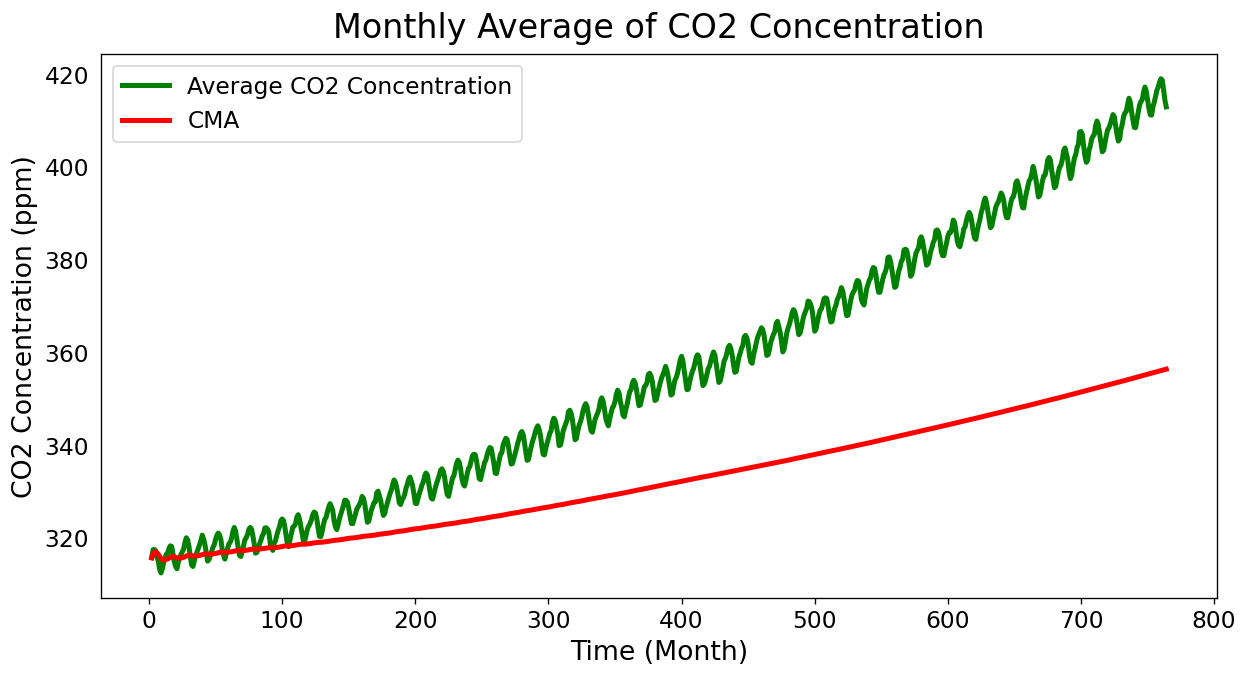

In [37]:
# Green = CO2 concentration, Red = CMA
colors = ['green', 'red']
# Line plot 
raw[["CO2_filled","CMA"]].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average CO2 Concentration', 'CMA'], fontsize=14)
plt.title('Monthly Average of CO2 Concentration', fontsize=20)
plt.xlabel('Time (Month)', fontsize=16)
plt.ylabel('CO2 Concentration (ppm)', fontsize=16)

#### Exponential Moving Average (EMA)
mainly used to identify trends and to filter out noise, weight of elements is decreased gradually over time; compared with SMA, the EMA is faster to change and more sensitive

In [38]:
#using smoothing factor (alpha) 0.1, 0.3, and 0.5
#the smoothing factor value should be 0-1
raw['EMA_0.1'] = raw["CO2_filled"].ewm(alpha=0.1, adjust=False).mean()
raw['EMA_0.3'] = raw["CO2_filled"].ewm(alpha=0.3, adjust=False).mean()
raw['EMA_0.5'] = raw["CO2_filled"].ewm(alpha=0.5, adjust=False).mean()

Text(0, 0.5, 'CO2 Concentration (ppm)')

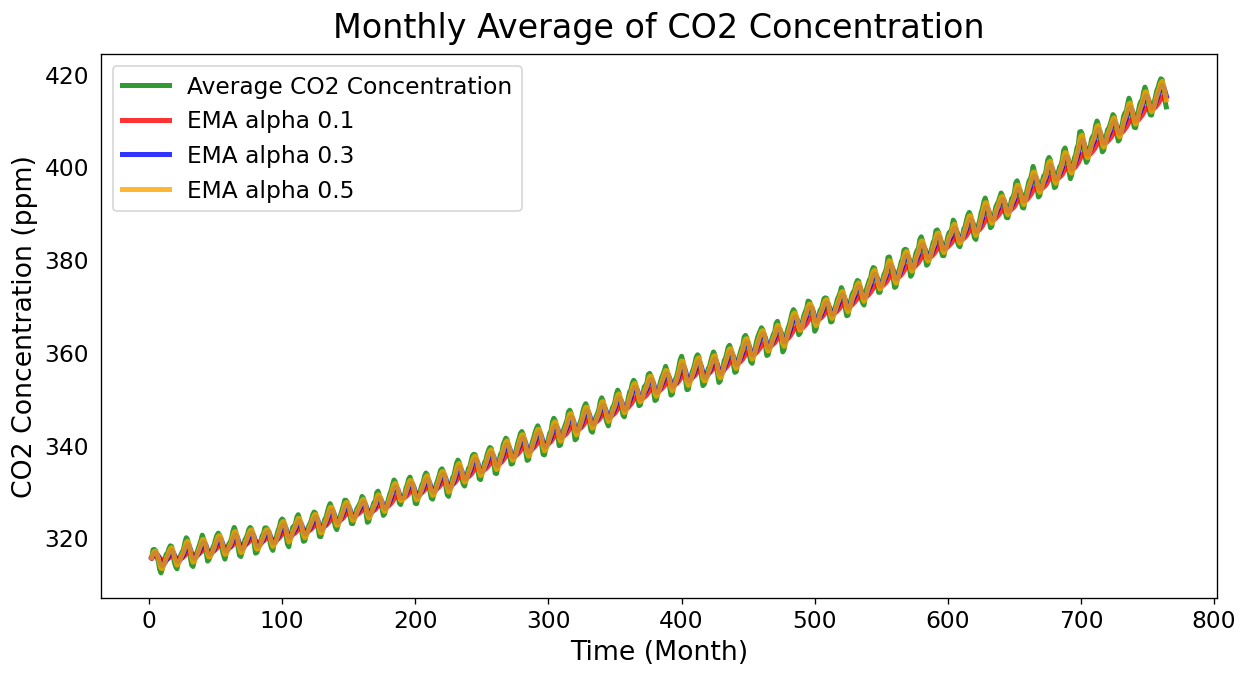

In [39]:
# Green = CO2 concentration, Red = 0.1, Blue = 0.3, Orange = 0.5
colors = ['green', 'red', 'blue','orange']
raw[['CO2_filled', 'EMA_0.1', 'EMA_0.3','EMA_0.5']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average CO2 Concentration', 'EMA alpha 0.1', 'EMA alpha 0.3', 'EMA alpha 0.5'], fontsize=14)
plt.title('Monthly Average of CO2 Concentration', fontsize=20)
plt.xlabel('Time (Month)', fontsize=16)
plt.ylabel('CO2 Concentration (ppm)', fontsize=16)

# Another Process
--------------------------------------------------------------------------------
## STEPS
1. Visualize the Time Series Data
2. Identify if the date is stationary
3. Plot the Correlation and Auto Correlation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime as dt, date
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# 1. Data Preparation

In [2]:
# importing data
co2 = pd.read_csv("data/mauna_loa_co2_formatted.csv")

# data preprocessing (rename column, subset rows without missing values, create date and set as index, column selection)
co2.rename(columns = {"Yr": "Year"}, inplace = True)
co2 = co2.iloc[2:765,]
co2["Date"] = co2["Mn"].astype(str) + '-' + co2["Year"].astype(str)
co2["Date"] = co2["Date"].apply(lambda x: dt.strptime(x, "%m-%Y"))
co2 = co2[["Date","CO2_filled"]]
co2.set_index("Date", inplace = True)
co2.head()

,CO2_filled
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,317.25
1958-07-01,315.86


## ARIMA Model

An ARIMA (Auto Regressive Integrated Moving Average) model is characterized by 3 terms: p, d, q
- p is the order of the AR term (number of lags of Y to be used as predictors)
- q is the order of the MA term (number of lagged forecast errors that should go into the ARIMA Model)
- d is the number of differencing (required to make the time series stationary)

*If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.*

Before building ARIMA model, we need to make the time series data stationary, because term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors, where Linear regression models work best when the predictors are not correlated and are independent of each other. To make the data stationary, the term "d" needed for differencing (most common approach to make the data stationary). If the time series already stationary, then d = 0.

#### AR Model
Yt depends only on its own lags

#### MA Model
Yt depends only on the lagged forecast errors

So, ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms

# 2. Check Time Series Stationarity
### Check Stationarity using Plot

<AxesSubplot:xlabel='Date'>

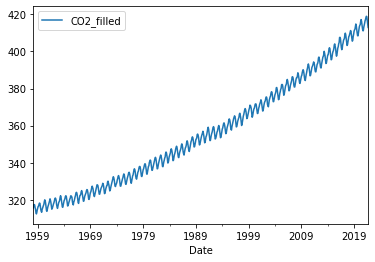

In [3]:
#trend -> non-stationary
co2.plot()

### Check Stationarity using Statistic Test (ADF Test / Unit Root)

- H0 = Time Series data is non-stationary
- H1 = Time Series data is stationary
- *Reject null hypothesis if p-value < significance level (0.05)*
- p-value = 1 (more than significance level 0.05, therefore can't reject null hypothesis)
- It means the time series data is **non-stationary** and need differencing

#### Conclusion :
1. Plot : non-stationary
2. Statistic test : non-stationary

In [4]:
adf_test = adfuller(co2.values, autolag='AIC')
#print(adf_test)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
for key, value in adf_test[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 5.244638321739868
p-value: 1.0
Critial Values:
   1%, -3.4391937559530965
Critial Values:
   5%, -2.8654430713273373
Critial Values:
   10%, -2.568848417404698


### Autocorrelation Plot (ACF Plot)

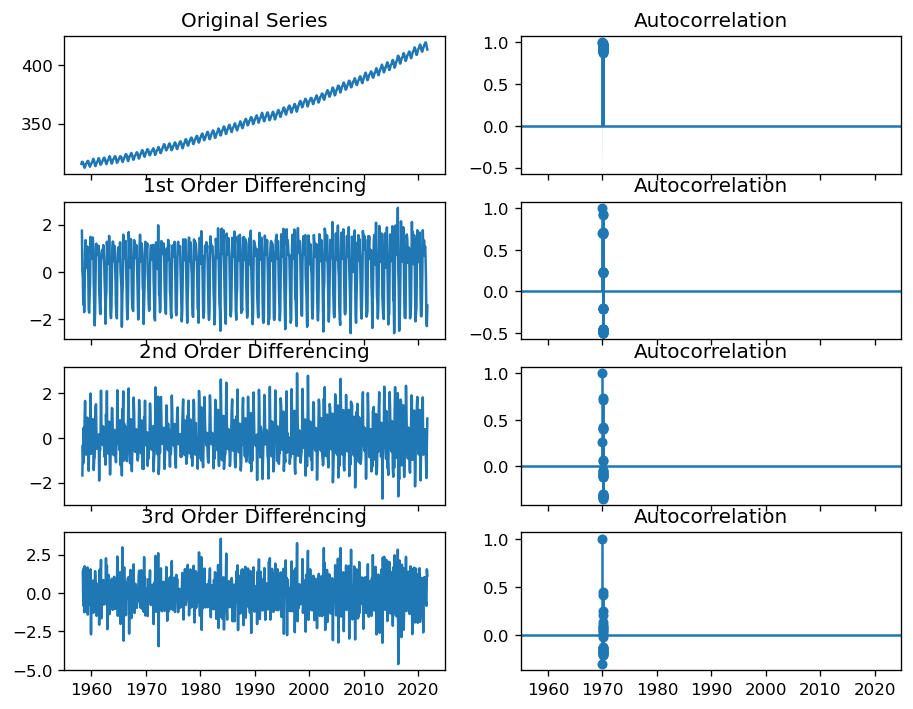

In [44]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(co2["CO2_filled"])
axes[0, 0].set_title('Original Series')
plot_acf(co2["CO2_filled"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(co2["CO2_filled"].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(co2["CO2_filled"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(co2["CO2_filled"].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(co2["CO2_filled"].diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(co2["CO2_filled"].diff().diff().diff())
axes[3, 0].set_title('3rd Order Differencing')
plot_acf(co2["CO2_filled"].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

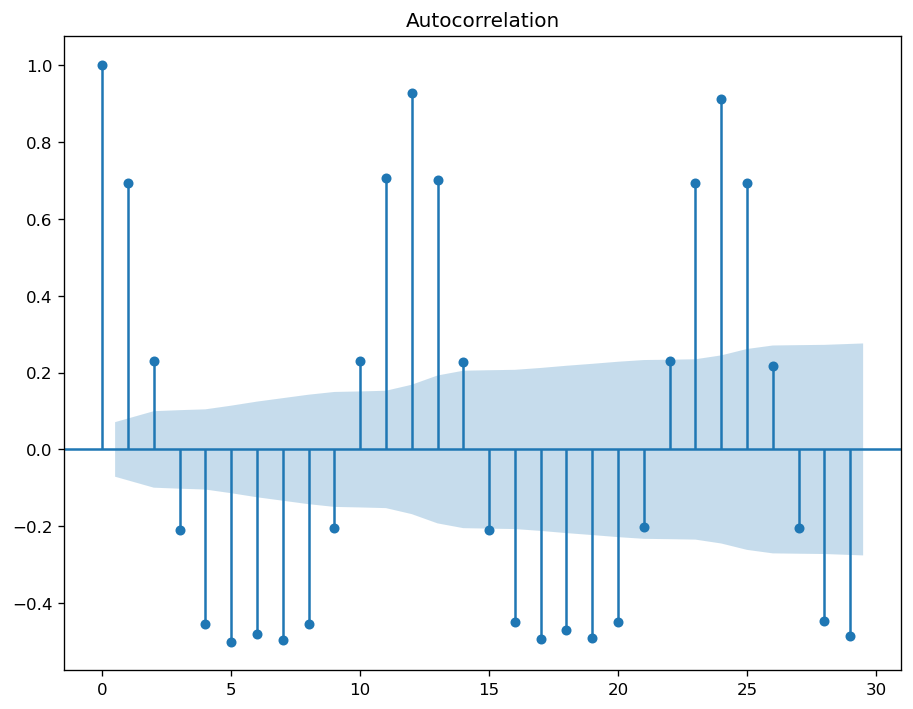

In [45]:
# 1st Differencing
plot_acf(co2["CO2_filled"].diff().dropna())
plt.show()

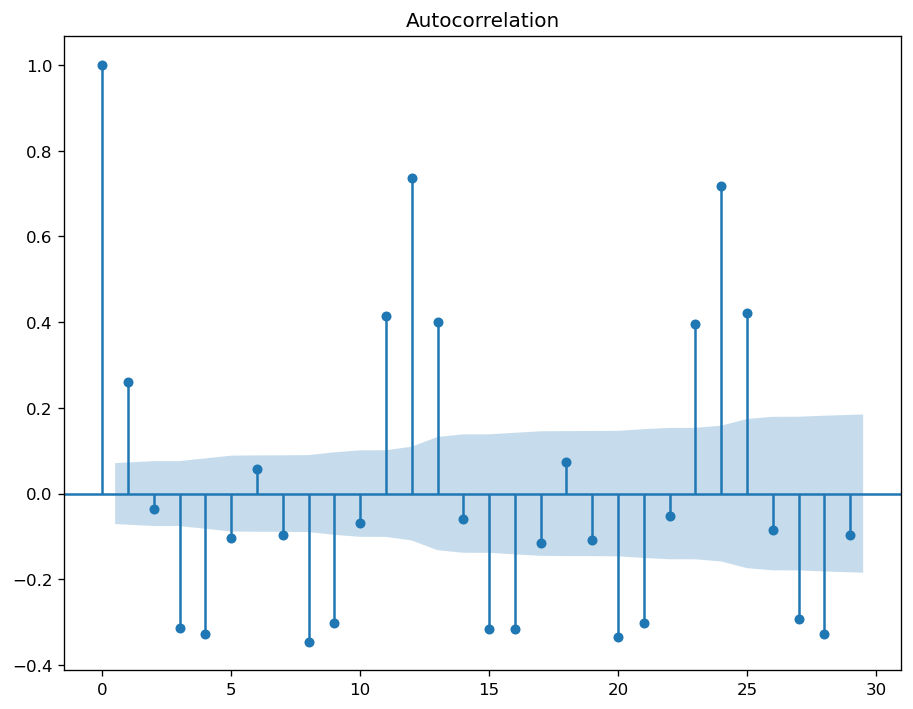

In [7]:
# 2nd Differencing
plot_acf(co2["CO2_filled"].diff().diff().dropna())
plt.show()

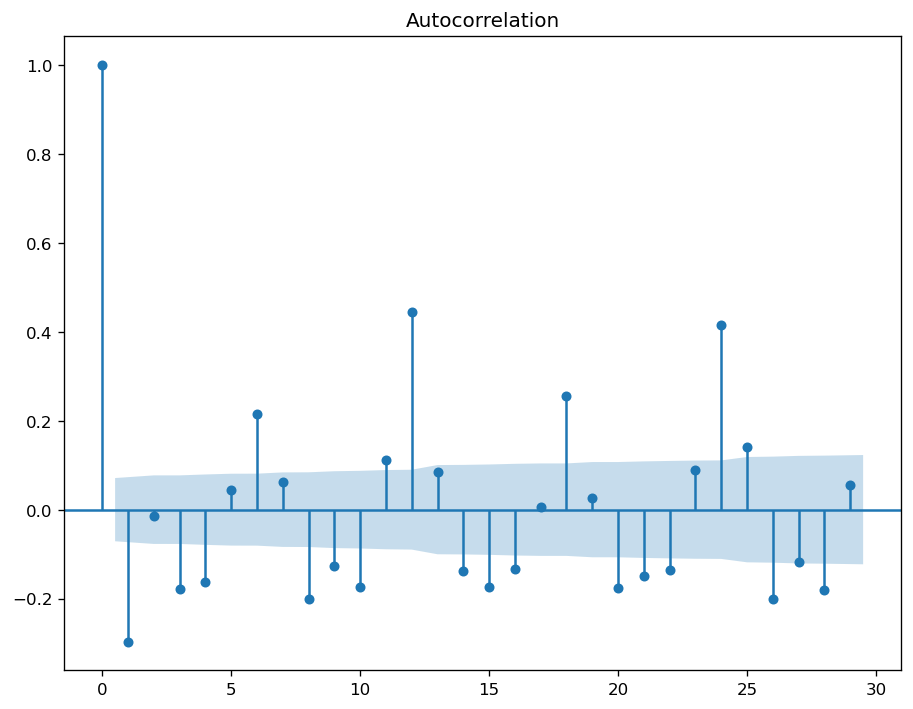

In [8]:
# 3rd Differencing
plot_acf(co2["CO2_filled"].diff().diff().diff().dropna())
plt.show()

In [9]:
#number of differencing based on statistical test for stationarity
## Adf Test
print("ADF Test : ", ndiffs(co2["CO2_filled"], test='adf'))
# KPSS test
print("KPSS Test : ", ndiffs(co2["CO2_filled"], test='kpss'))
# PP test:
print("PP Test : ", ndiffs(co2["CO2_filled"], test='pp'))

ADF Test :  1
KPSS Test :  1
PP Test :  0


The next step is identifying the order of the AR term (p) by inspecting the Partial Autocorrelation (PACF) plot

### Partial Autocorrelation Plot (PACF Plot)

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

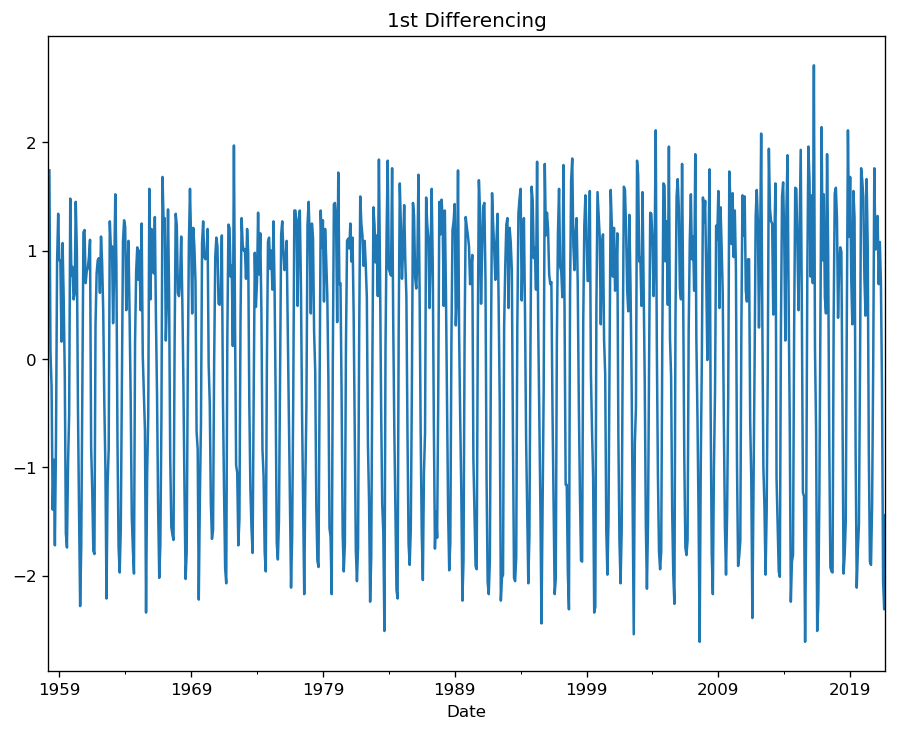

In [10]:
#1st differencing plot
first_diff = co2["CO2_filled"].diff()
first_diff.plot()
plt.title('1st Differencing')
plt.show()

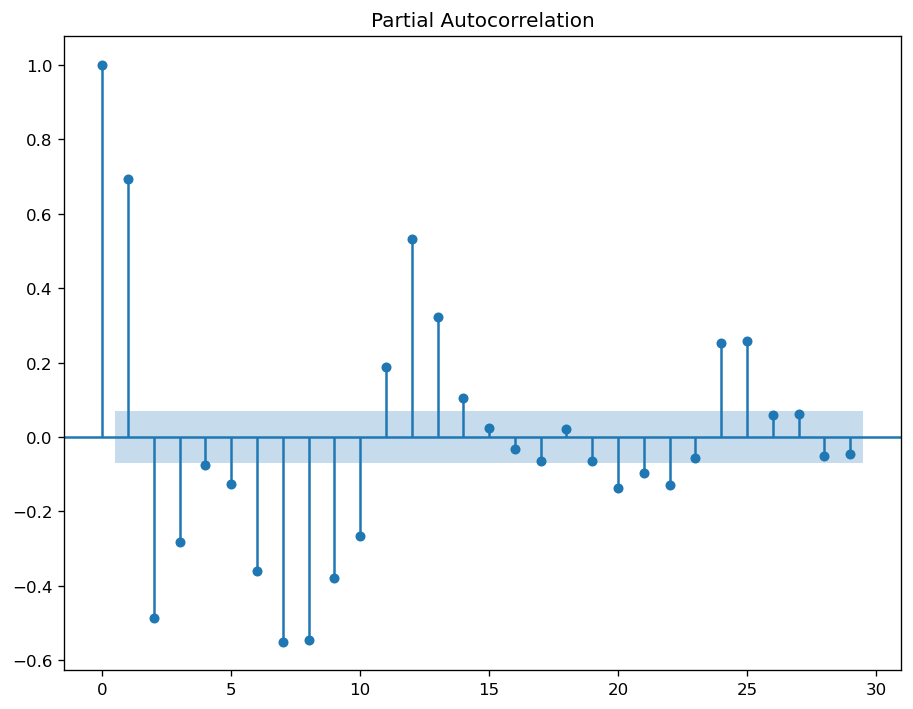

In [11]:
# PACF plot of 1st differenced series
plot_pacf(first_diff.dropna())
plt.show()

From PACF plot above, the lags that are quite significant were located well above the significance limit (blue region). Lag 2 turns out to be significant, but lag 1 is more significant.

Next, identify the order of the MA term (q) by inspecting the Autocorrelation (ACF) plot of the differenced series (in this case using 1st differencing)

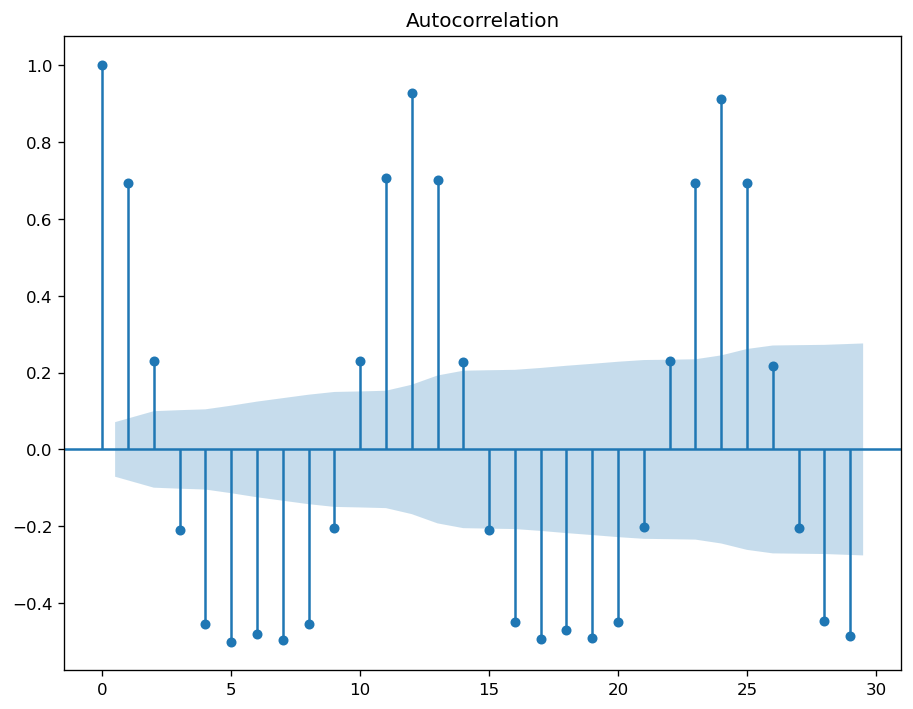

In [12]:
plot_acf(co2["CO2_filled"].diff().dropna())
plt.show()

From ACF plot above, the lags that are quite significant were located well above the significance limit (blue region). We can use either lag 1 or lag 2, but tentatively we use q = 1 then go with the simpler model that sufficiently explains the Y when in doubt.

#### How to handle if a time series is slightly under or over differenced?
If your series is slightly under differenced, adding one or more additional AR terms (p) usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term (q).

# 3. Build ARIMA Model

In [13]:
# p=1,d=1,q=1 ARIMA Model
model1 = ARIMA(co2["CO2_filled"], order=(1,1,1), freq=co2.index.inferred_freq)
model1_fit = model1.fit()
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  763
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -947.885
Date:                Mon, 10 Jan 2022   AIC                           1901.770
Time:                        08:38:09   BIC                           1915.678
Sample:                    03-01-1958   HQIC                          1907.125
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5520      0.041     13.570      0.000       0.472       0.632
ma.L1          0.3809      0.044      8.612      0.000       0.294       0.468
sigma2         0.7039      0.043     16.490      0.0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


The p-value (P>|z|) should ideally be less than 0.05 for the respective X to be significant. All of the p-values are less than 0.05 which means all of the parameters are significant. Next we tried to change the MA term into value of 2 and compare the results.

In [14]:
# p=1,d=1,q=2 ARIMA Model
model2 = ARIMA(co2["CO2_filled"], order=(1,1,2), freq=co2.index.inferred_freq)
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  763
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -921.281
Date:                Mon, 10 Jan 2022   AIC                           1850.563
Time:                        08:38:17   BIC                           1869.107
Sample:                    03-01-1958   HQIC                          1857.703
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3965      0.065      6.087      0.000       0.269       0.524
ma.L1          0.5539      0.066      8.430      0.000       0.425       0.683
ma.L2          0.3144      0.052      6.087      0.0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Same with the first model, all of the p-values in the second model are less than 0.05 which means all of the parameters are significant. But as we can see, the AIC value of second model is lower than the first model, which means the second model is better than the first model. We can build many models with different combinations of the terms.

In [15]:
# p=1,d=2,q=1 ARIMA Model
model3 = ARIMA(co2["CO2_filled"], order=(1,2,1), freq=co2.index.inferred_freq)
model3_fit = model3.fit()
print(model3_fit.summary())
# ar1 & ma1 not significant

                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  763
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1033.051
Date:                Mon, 10 Jan 2022   AIC                           2072.102
Time:                        08:38:18   BIC                           2086.006
Sample:                    03-01-1958   HQIC                          2077.456
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1338      0.152      0.880      0.379      -0.164       0.432
ma.L1          0.1431      0.148      0.965      0.334      -0.147       0.434
sigma2         0.8843      0.044     20.053      0.0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
# p=2,d=1,q=1 ARIMA Model
model4 = ARIMA(co2["CO2_filled"], order=(2,1,1), freq=co2.index.inferred_freq)
model4_fit = model4.fit()
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  763
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -824.254
Date:                Mon, 10 Jan 2022   AIC                           1656.508
Time:                        08:38:19   BIC                           1675.051
Sample:                    03-01-1958   HQIC                          1663.648
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5251      0.027     56.940      0.000       1.473       1.578
ar.L2         -0.8226      0.028    -29.499      0.000      -0.877      -0.768
ma.L1         -0.7842      0.032    -24.573      0.0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [17]:
# p=2,d=1,q=2 ARIMA Model
model5 = ARIMA(co2["CO2_filled"], order=(2,1,2), freq=co2.index.inferred_freq)
model5_fit = model5.fit()
print(model5_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  763
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -824.152
Date:                Mon, 10 Jan 2022   AIC                           1658.303
Time:                        08:38:19   BIC                           1681.483
Sample:                    03-01-1958   HQIC                          1667.228
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5191      0.032     47.514      0.000       1.456       1.582
ar.L2         -0.8166      0.035    -23.479      0.000      -0.885      -0.748
ma.L1         -0.7654      0.049    -15.562      0.0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


From the 5 models above, the best model with all significant parameters and has the lowest AIC value is model4 with p=2, d=1, and q=1. Then we need to take a look the residual plot to ensure there are no patterns (constant mean and variance).

### Residual Plot

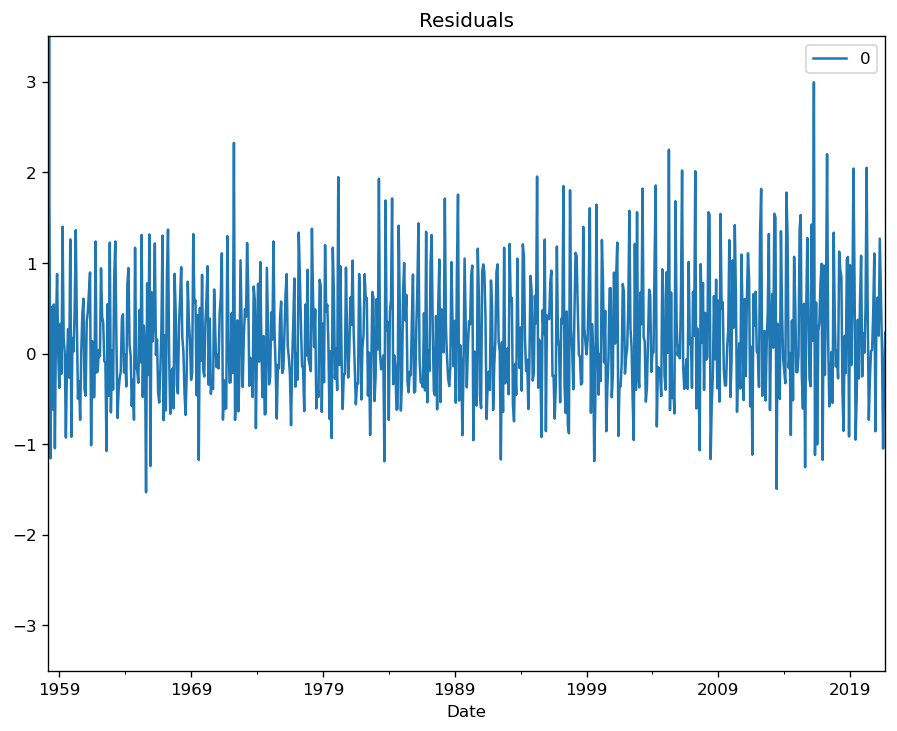

In [18]:
residuals = pd.DataFrame(model4_fit.resid)
residuals.plot(title="Residuals")
plt.ylim(bottom = -3.5, top = 3.5) 
plt.show()

In [19]:
# Actual vs Fitted
fitted = model4_fit.predict()
predicted = co2.copy()
predicted["Fitted"] = np.around(fitted.values, 2)
predicted.rename(columns = {"CO2_filled": "Actual"}, inplace = True)
predicted['Fitted'] = predicted['Fitted'].replace(0, np.nan)
print(predicted.head())
print(co2.head())

            Actual  Fitted
Date                      
1958-03-01  315.71     NaN
1958-04-01  317.45  315.71
1958-05-01  317.51  318.67
1958-06-01  317.25  316.74
1958-07-01  315.86  316.48
            CO2_filled
Date                  
1958-03-01      315.71
1958-04-01      317.45
1958-05-01      317.51
1958-06-01      317.25
1958-07-01      315.86


In [20]:
pred = predicted.reset_index().melt('Date', var_name='Type', value_name='CO2').dropna()
pred

,Date,Type,CO2
0,1958-03-01,Actual,315.71
1,1958-04-01,Actual,317.45
2,1958-05-01,Actual,317.51
3,1958-06-01,Actual,317.25
4,1958-07-01,Actual,315.86
...,...,...,...
1521,2021-05-01,Fitted,418.32
1522,2021-06-01,Fitted,418.65
1523,2021-07-01,Fitted,417.70
1524,2021-08-01,Fitted,414.55


In [21]:
# Create a selection that chooses the nearest point & selects based on x-value
hover =  alt.selection_single(
        encodings = ["x"],
        nearest=True,
        on="mouseover",
        empty="none",
        clear="mouseout"
)

# The basic line
line = alt.Chart(pred).mark_line(interpolate='basis').encode(
    x= alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title = "Time"),
    y= alt.Y('CO2:Q', axis=alt.Axis(title='CO2 Concentration (ppm)')),
    color='Type:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(pred).mark_point().encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title = "Time"),
    opacity=alt.value(0),
    tooltip = [alt.Tooltip("Date:O", timeUnit="yearmonth", title="Time")]
).add_selection(
    hover
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(hover, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='center', dx=20, dy=-20).encode(
    text=alt.condition(hover, 'CO2:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(pred).mark_rule(color='gray').encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title = "Time"),
).transform_filter(
    hover
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    title = "Actual vs. Predicted CO2 Concentration",
    width=800, height=300
).interactive()

alt.LayerChart(...)

# 4. Metrics

In [22]:
def metrics(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mse = np.mean((forecast - actual)**2)       # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':mape, 'MSE':mse, 'MAE': mae, 'RMSE':rmse})

metrics(predicted["Fitted"], predicted["Actual"])

{'MAPE': 0.0015617022191523422,
 'MSE': 0.5116698162729665,
 'MAE': 0.5569291338582687,
 'RMSE': 0.7153109926968594}

In [48]:
#split into train & test
print(co2.describe())
#count = 763
#number of data for train 75% and test 25%
print("Train = ", int(round(763*0.75,0)))
print("Test = ", int(round(763*0.25,0)))
train_end = int(round((len(co2["CO2_filled"])*0.75),2))
print(train_end)

       CO2_filled
count  763.000000
mean   356.365570
std     29.617997
min    312.440000
25%    329.450000
50%    353.110000
75%    380.440000
max    418.950000
Train =  572
Test =  191
572


In [24]:
#in time series, train & test split cannot be random
train_end = int(round((len(co2["CO2_filled"])*0.75),2))
train = co2["CO2_filled"][:572]
test = co2["CO2_filled"][572:]

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             CO2_filled   No. Observations:                  572
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -543.102
Date:                Mon, 10 Jan 2022   AIC                           1098.204
Time:                        08:38:28   BIC                           1124.278
Sample:                    03-01-1958   HQIC                          1108.377
                         - 10-01-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5337      0.049     31.239      0.000       1.437       1.630
ar.L2         -0.8225      0.085     -9.710      0.000      -0.989      -0.656
ar.L3         -0.0207      0.053     -0.389      0.6

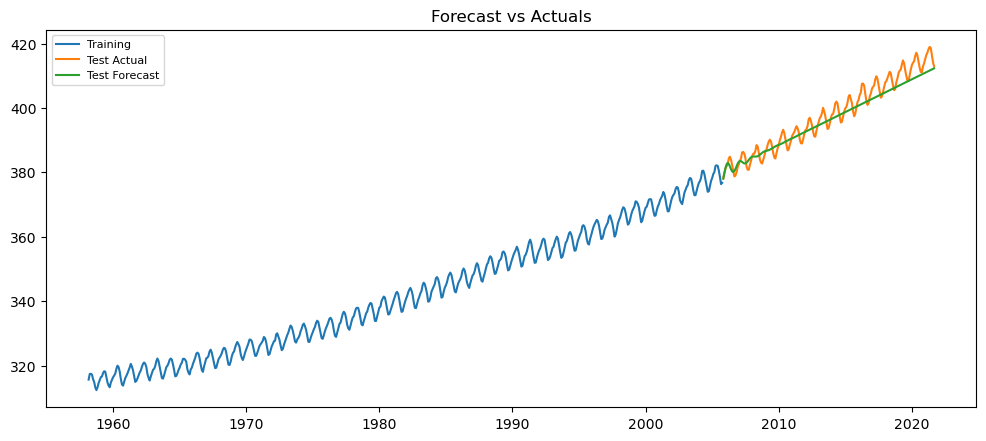

{'MAPE': 0.006194788005124373, 'MSE': 9.336020114839753, 'MAE': 2.488367983813215, 'RMSE': 3.0554901595062867}


In [25]:
#create model for train data
train_model = ARIMA(train, order = (3,2,2))
train_fit = train_model.fit()
print(train_fit.summary())

#forecasting test data
test_pred = train_fit.forecast(len(test), alpha = 0.05)

#compare predicted test data with actual test data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Test Actual')
plt.plot(test_pred, label='Test Forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#metrics
print(metrics(test_pred, test))

Around 0.6% MAPE implies the model is about 99.4% accurate in predicting the data test observations.

### Auto-ARIMA Forecast
Auto-ARIMA uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [26]:
best_model = pm.auto_arima(co2["CO2_filled"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(best_model.summary())

C:\Users\ASUS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1901.831, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2508.110, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2007.227, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2050.735, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2513.987, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1561.103, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1802.255, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1562.869, Time=0.76 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1562.791, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1850.485, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1742.269, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1565.001, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1656.508, Time=0.09 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.622 seconds
                      

The Auto-ARIMA result above said that the best model is model with term p=2, d=1, and q=1, which is the same result as the manual model (model4).

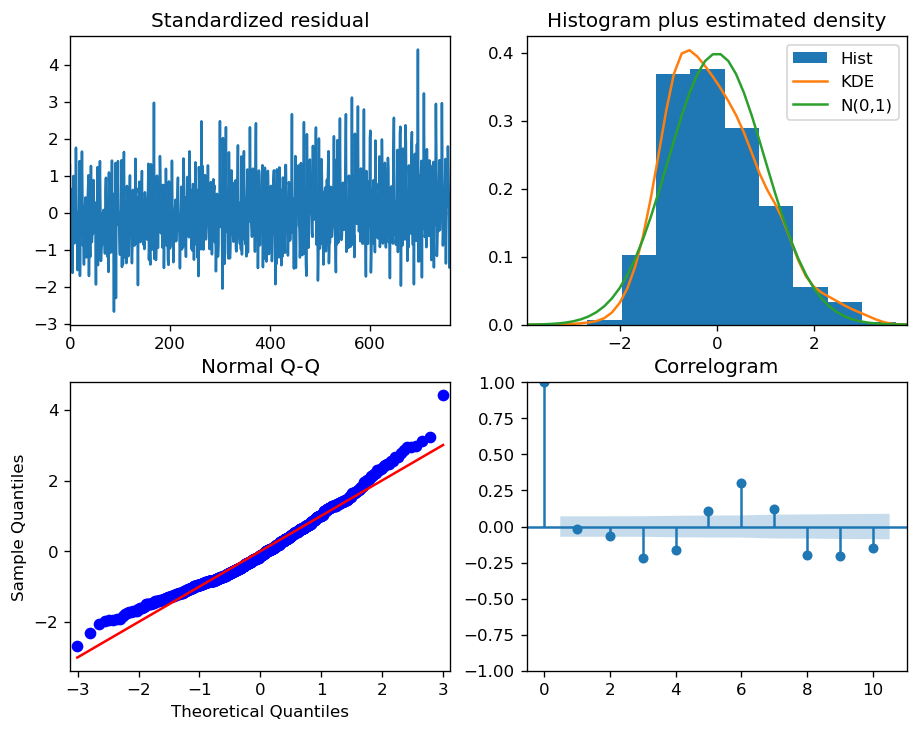

In [43]:
best_model.plot_diagnostics()
plt.show()

In [37]:
#model_fix = ARIMA(co2["CO2_filled"], order=(2,1,1), freq=co2.index.inferred_freq)
model_fix = ARIMA(co2["CO2_filled"], order=(3,2,1), freq=co2.index.inferred_freq)
fix_fit = model_fix.fit()

#forecasting next 12 periods
forecast = fix_fit.forecast(50, alpha = 0.05)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [38]:
co2

,CO2_filled
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,317.25
1958-07-01,315.86
...,...
2021-05-01,418.95
2021-06-01,418.70
2021-07-01,416.65


In [39]:
n_periods = 125
fitted, confint = best_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(co2["CO2_filled"].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.DataFrame(fitted, index=index_of_fc)
fitted_series.index.name = "Date"
fitted_series.rename(columns = {0 : "Forecast"}, inplace = True)
print(fitted_series.reset_index().info())
print(co2.reset_index().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      125 non-null    datetime64[ns]
 1   Forecast  125 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        763 non-null    datetime64[ns]
 1   CO2_filled  763 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB
None


In [40]:
combine = pd.concat([co2, fitted_series], axis = 0)
combine_noidx = combine.reset_index()
combine_noidx["Month"] = combine_noidx["Date"].apply(lambda x: x.strftime("%b"))
combine_noidx["Year"] = combine_noidx["Date"].apply(lambda x: x.strftime("%Y"))
combine_noidx

,Date,CO2_filled,Forecast,Month,Year
0,1958-03-01,315.71,NaN,Mar,1958
1,1958-04-01,317.45,NaN,Apr,1958
2,1958-05-01,317.51,NaN,May,1958
3,1958-06-01,317.25,NaN,Jun,1958
4,1958-07-01,315.86,NaN,Jul,1958
...,...,...,...,...,...
883,2031-09-01,NaN,431.991810,Sep,2031
884,2031-10-01,NaN,432.125251,Oct,2031
885,2031-11-01,NaN,432.258712,Nov,2031
886,2031-12-01,NaN,432.392174,Dec,2031


In [41]:
# ARIMA best model : ARIMA(2,1,1)
# Forecast
n_periods = 125
fitted, confint = best_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(co2["CO2_filled"].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.DataFrame(fitted, index=index_of_fc)
fitted_series.index.name = "Date"
fitted_series.rename(columns = {0 : "Forecast"}, inplace = True)

combine = pd.concat([co2, fitted_series], axis = 0)
combine_noidx = combine.reset_index()
combine_noidx["Month"] = combine_noidx["Date"].apply(lambda x: x.strftime("%b"))
combine_noidx["Year"] = combine_noidx["Date"].apply(lambda x: x.strftime("%Y"))

# Plot
act = alt.Chart(combine_noidx).mark_line(color = "blue").encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
    y=alt.Y("CO2_filled:Q", title='Average CO2 (ppm)')
)

pred = alt.Chart(combine_noidx).mark_line(color = "green").encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
    y=alt.Y("Forecast:Q", title='Average CO2 (ppm)')
)

hover = alt.selection_single(
        encodings=["x"],
        nearest=True,
        on="mouseover",
        empty="none",
        clear="mouseout"
    )

show = alt.Chart(combine_noidx).mark_point().encode(
            x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
            opacity=alt.value(0),
            tooltip=[alt.Tooltip("CO2_filled:Q", format=",.2f"), alt.Tooltip("Forecast:Q", format=",.2f"), "Month", "Year"]
        ).add_selection(
            hover
        )

rule = alt.Chart(combine_noidx).mark_rule().encode(
            x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
            opacity=alt.condition(hover, alt.value(1), alt.value(0))
        ).transform_filter(
            hover
        )

point_act = act.mark_circle(color="red").encode(
                opacity=alt.condition(hover, alt.value(1), alt.value(0))
            ).transform_filter(hover)

point_pred = pred.mark_circle(color="red").encode(
                opacity=alt.condition(hover, alt.value(1), alt.value(0))
            ).transform_filter(hover)

alt.layer(act, pred, show, rule, point_act, point_pred
).properties(
    title = "ARIMA - Final Forecast of CO2 Concentration",
    height = 300,
    width = 800
).interactive()


alt.LayerChart(...)

### Auto-SARIMA Forecast
Auto-SARIMA same with Auto-ARIMA, except it supports seasonality

In [42]:
season_model = pm.auto_arima(co2["CO2_filled"], 
                             start_p=1, start_q=1, test='adf',
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=True,
                             d=None, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

print(season_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=386.693, Time=4.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1751.324, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=640.817, Time=2.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1292.335, Time=0.91 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2997.695, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=745.932, Time=0.53 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=388.591, Time=11.64 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=565.271, Time=3.46 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=14.25 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=383.827, Time=4.76 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=746.477, Time=0.78 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=5.90 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=i

In [ ]:
# SARIMA best model : ARIMA(1,0,3)(0,1,1)[12]
# Forecast
n_periods = 125
fitted, confint = season_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(co2["CO2_filled"].index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.DataFrame(fitted, index=index_of_fc)
fitted_series.index.name = "Date"
fitted_series.rename(columns = {0 : "Forecast"}, inplace = True)

combine = pd.concat([co2, fitted_series], axis = 0)
combine_noidx = combine.reset_index()
combine_noidx["Month"] = combine_noidx["Date"].apply(lambda x: x.strftime("%b"))
combine_noidx["Year"] = combine_noidx["Date"].apply(lambda x: x.strftime("%Y"))

# Plot
act = alt.Chart(combine_noidx).mark_line(color = "blue").encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
    y=alt.Y("CO2_filled:Q", title='Average CO2 (ppm)')
)

pred = alt.Chart(combine_noidx).mark_line(color = "green").encode(
    x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
    y=alt.Y("Forecast:Q", title='Average CO2 (ppm)')
)

hover = alt.selection_single(
        encodings=["x"],
        nearest=True,
        on="mouseover",
        empty="none",
        clear="mouseout"
    )

show = alt.Chart(combine_noidx).mark_point().encode(
            x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
            opacity=alt.value(0),
            tooltip=[alt.Tooltip("CO2_filled:Q", format=",.2f"), alt.Tooltip("Forecast:Q", format=",.2f"), "Month", "Year"]
        ).add_selection(
            hover
        )

rule = alt.Chart(combine_noidx).mark_rule().encode(
            x=alt.X("Date:O", timeUnit="yearmonth", axis=alt.Axis(format="%b-%Y"), title="Date"),
            opacity=alt.condition(hover, alt.value(1), alt.value(0))
        ).transform_filter(
            hover
        )

point_act = act.mark_circle(color="red").encode(
                opacity=alt.condition(hover, alt.value(1), alt.value(0))
            ).transform_filter(hover)

point_pred = pred.mark_circle(color="red").encode(
                opacity=alt.condition(hover, alt.value(1), alt.value(0))
            ).transform_filter(hover)

alt.layer(act, pred, show, rule, point_act, point_pred
).properties(
    title = "SARIMA - Final Forecast of CO2 Concentration",
    height = 300,
    width = 800
).interactive()